In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logcsv/log2.csv


In [3]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [4]:
df = pd.read_csv('/kaggle/input/logcsv/log2.csv')


In [6]:
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [7]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [8]:
df['Action']

0        allow
1        allow
2        allow
3        allow
4        allow
         ...  
65527    allow
65528    allow
65529     drop
65530     drop
65531     drop
Name: Action, Length: 65532, dtype: object

In [10]:
Y = df.Action.copy()
X= df.drop('Action',axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

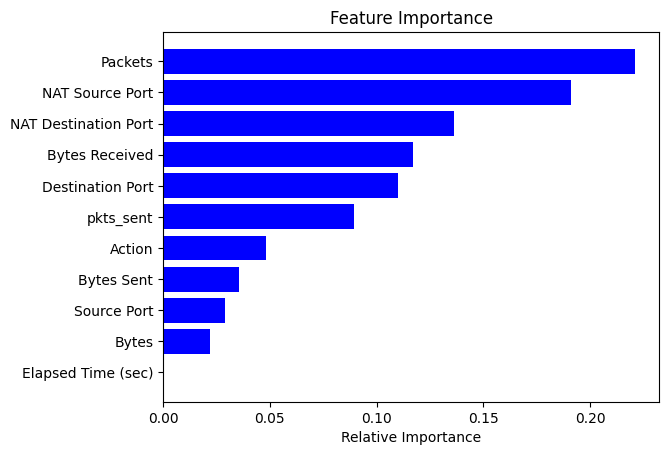

In [12]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


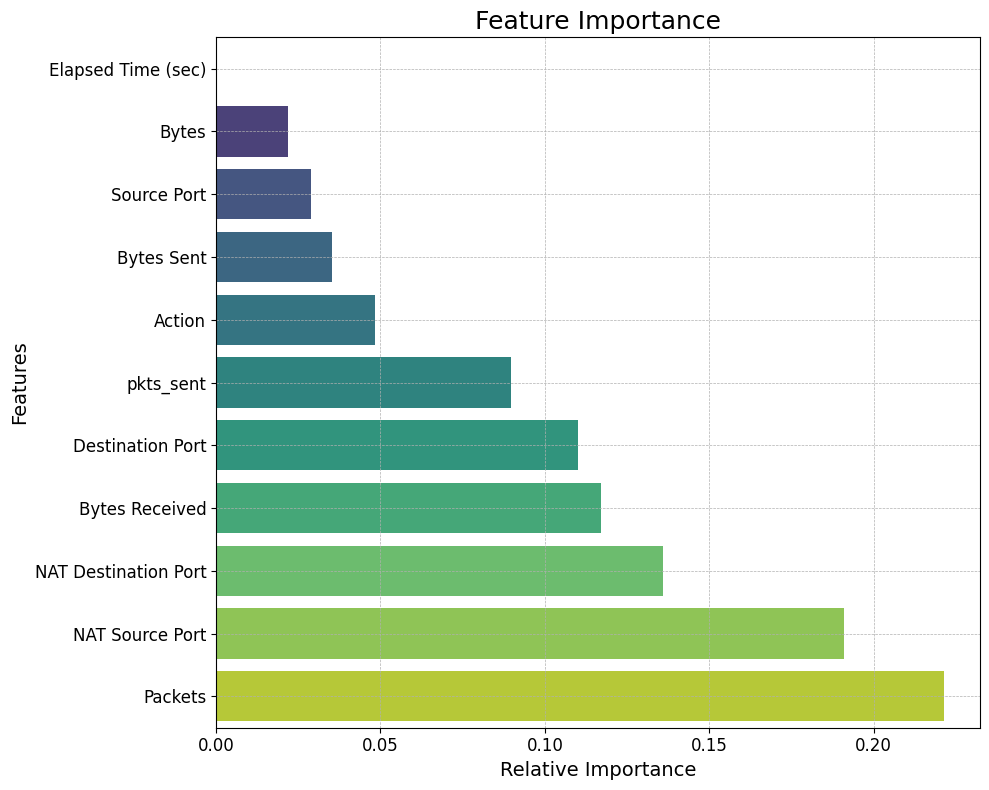

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For better aesthetics

# Assuming cls is your trained model and df is your DataFrame
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Use a more visually appealing color and bar format
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='viridis')

# Add a title and labels with enhanced font sizes for better visibility
plt.title('Feature Importance', fontsize=18)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Customize tick parameters for aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid can make it easier to read the exact values off the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-tick labels
plt.show()


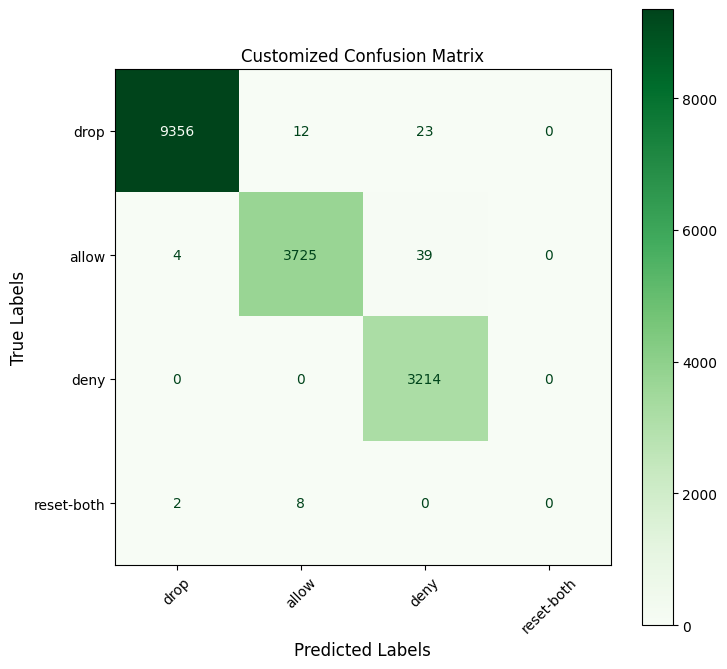

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
class_names = ['drop','allow','deny','reset-both']
# Assuming you have cls (classifier), X_test, and y_test already defined
y_pred = cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Larger figure size
disp.plot(cmap=plt.cm.Greens, ax=ax, colorbar=True )  # Change colormap, remove colorbar

# Further customize with matplotlib
ax.set_title('Customized Confusion Matrix')
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [15]:
Y.value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

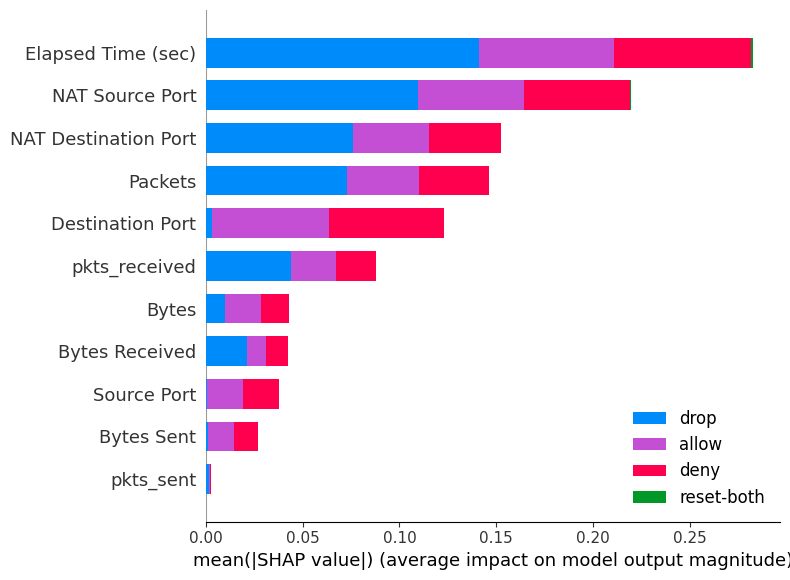

In [16]:

# After training the model, you can compute SHAP values for explanations
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

# Ensure you're using `feature_names` from `X_test` if it's a pandas DataFrame
#feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else None

shap.summary_plot(shap_values, X.values, plot_type='bar', class_names=class_names, feature_names=X.columns)


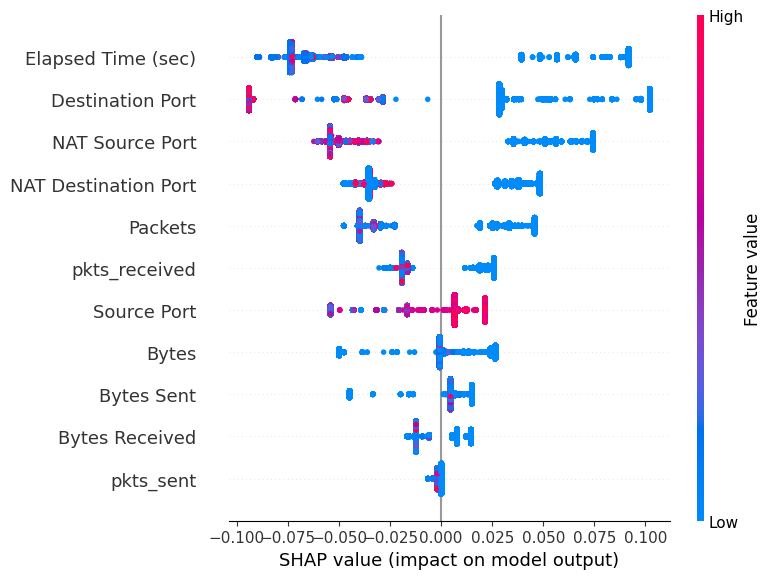

In [17]:
shap.summary_plot(shap_values[2], X.values, feature_names = X.columns)

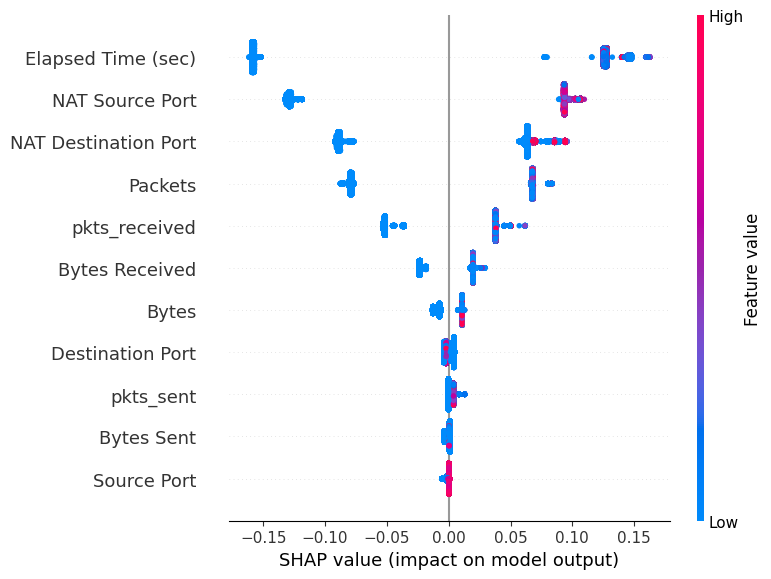

In [18]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)

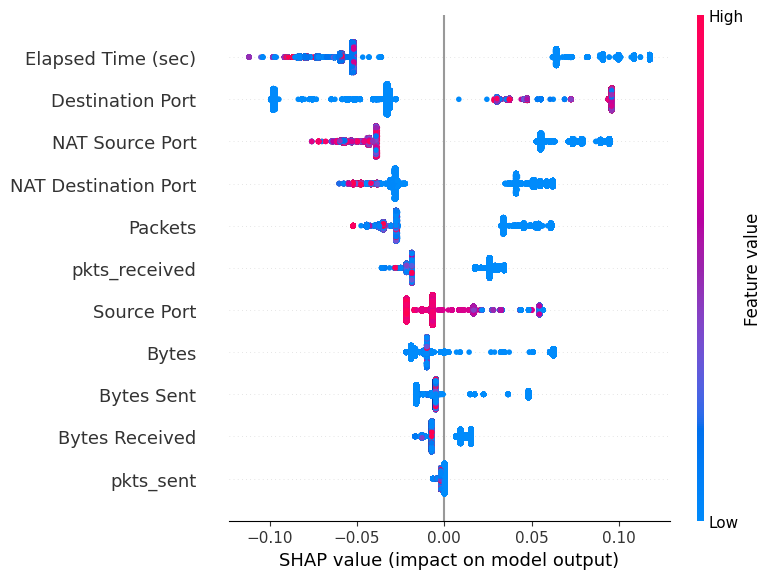

In [19]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

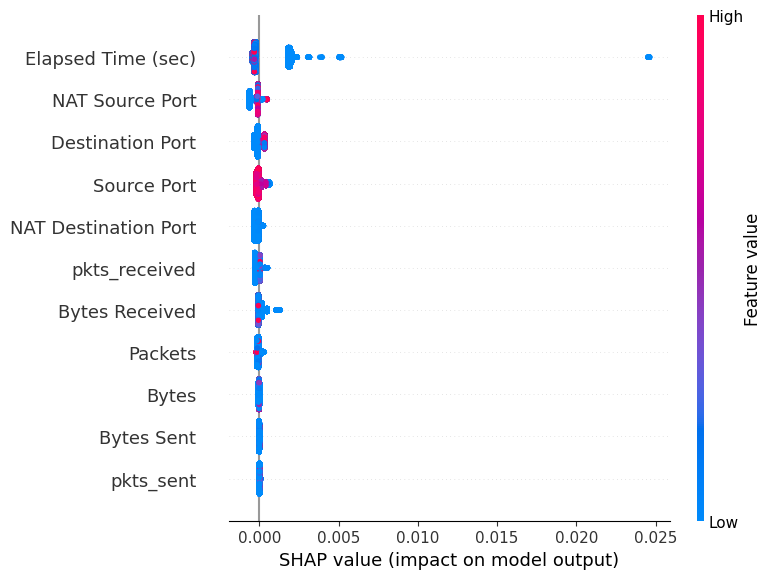

In [20]:
shap.summary_plot(shap_values[3], X.values, feature_names = X.columns)

In [22]:
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Source Port           65532 non-null  int64
 1   Destination Port      65532 non-null  int64
 2   NAT Source Port       65532 non-null  int64
 3   NAT Destination Port  65532 non-null  int64
 4   Bytes                 65532 non-null  int64
 5   Bytes Sent            65532 non-null  int64
 6   Bytes Received        65532 non-null  int64
 7   Packets               65532 non-null  int64
 8   Elapsed Time (sec)    65532 non-null  int64
 9   pkts_sent             65532 non-null  int64
 10  pkts_received         65532 non-null  int64
dtypes: int64(11)
memory usage: 5.5 MB


In [28]:
shap.initjs()
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

In [27]:
i = 65531
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names=X.columns)

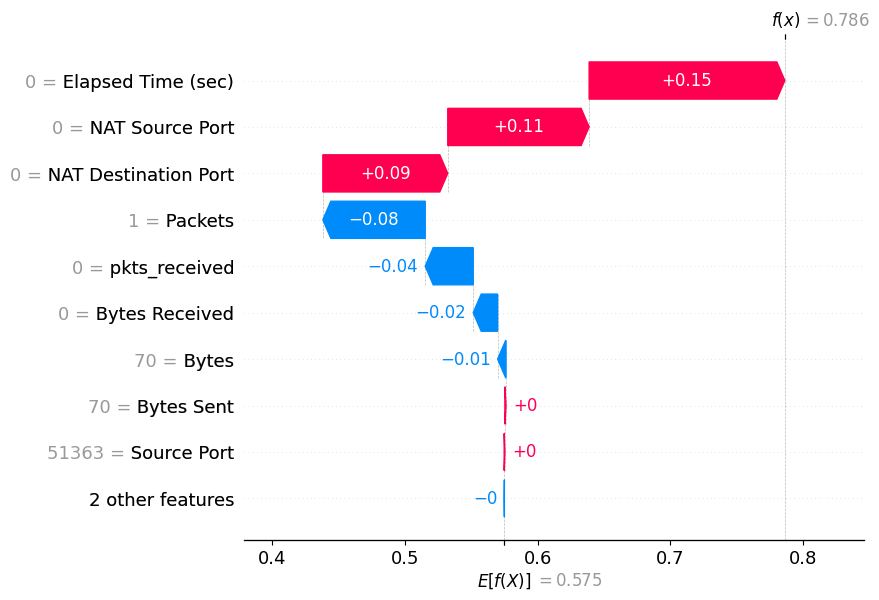

In [29]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [31]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows = df.shape[0]
print("Number of rows:", num_rows)


Number of rows: 65532
